<a href="https://colab.research.google.com/github/Akpams/Mnist-dataset-Classification/blob/main/classification_on_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
# from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from tensorflow.keras import layers, models
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
def display_image1(exam, labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    idx=np.random.randint(0, exam.shape[0]-1)
    img=exam[idx]
    label = labels[idx]

    plt.subplot(5, 5, i+1)
    plt.title(str(label))
    plt.tight_layout()
    plt.imshow(img, cmap="gray")
  plt.show()

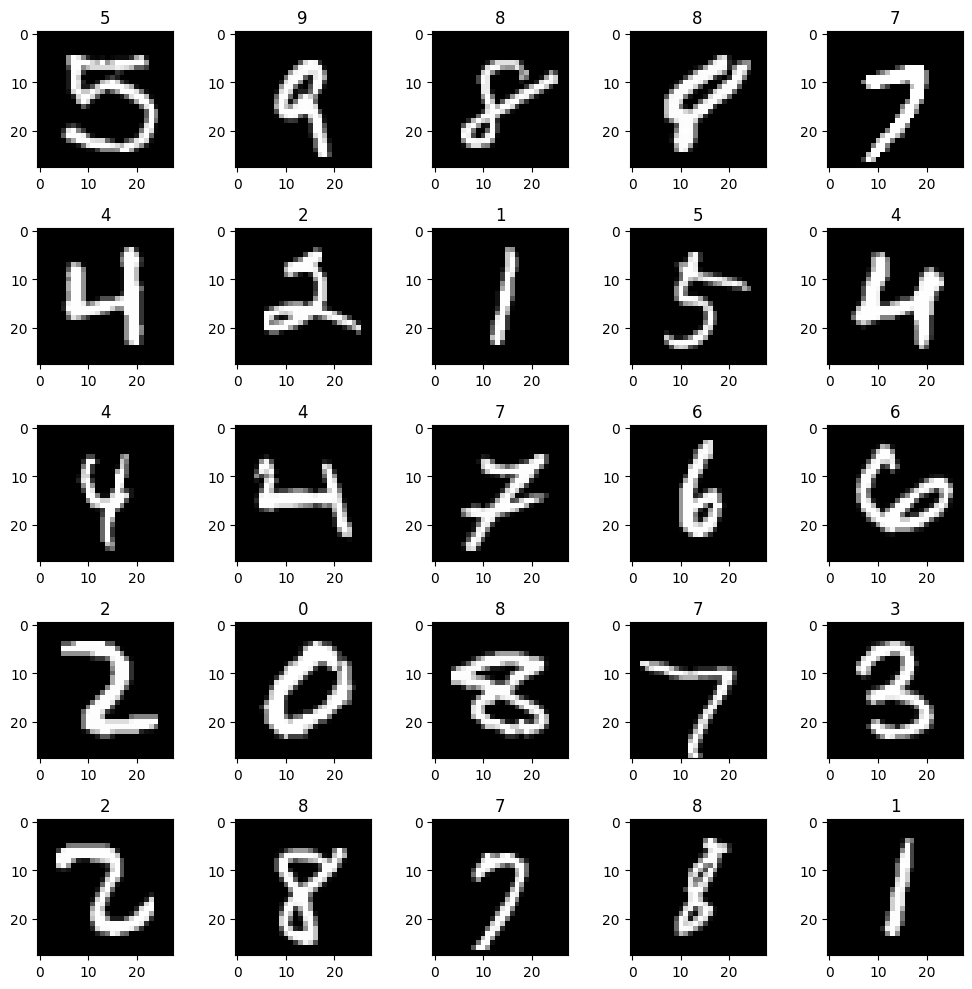

In [ ]:
display_image1(X_train, y_train)

In [ ]:
X_train = X_train.astype("float32")/255.0
X_test = X_test.astype("float32")/255.0

In [ ]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [ ]:
model = tensorflow.keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(),

    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPool2D(),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics="Accuracy")

In [ ]:
histeory= model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
938/938 [==============================] - 10s 8ms/step - loss: 0.1063 - Accuracy: 0.9689 - val_loss: 0.0819 - val_Accuracy: 0.9763
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0475 - Accuracy: 0.9864 - val_loss: 0.0482 - val_Accuracy: 0.9871
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0367 - Accuracy: 0.9891 - val_loss: 0.0665 - val_Accuracy: 0.9828
Epoch 4/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0290 - Accuracy: 0.9908 - val_loss: 0.0478 - val_Accuracy: 0.9874
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0247 - Accuracy: 0.9922 - val_loss: 0.0648 - val_Accuracy: 0.9854
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0221 - Accuracy: 0.9935 - val_loss: 0.0467 - val_Accuracy: 0.9887
Epoch 7/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0176 - Accuracy: 0.9947 - val_loss: 0.0550 - val_Accuracy: 0.9865
Epoch

In [ ]:
from re import VERBOSE
evaluate =model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print(evaluate)

[0.04801393300294876, 0.9901000261306763]


In [ ]:
print(f" Test accuracy: {evaluate[1]}")

 Test accuracy: 0.9901000261306763


In [ ]:
histeory.history["Accuracy"]

[0.97038334608078,
 0.9883999824523926,
 0.9920833110809326,
 0.9938833117485046,
 0.9953500032424927,
 0.9947166442871094,
 0.9962833523750305,
 0.9968500137329102,
 0.9973000288009644,
 0.9969666600227356]

##INFERENCE ON SINGLE IMAGE

1/1 [==============================] - 0s 18ms/step
Predicted digit: 2


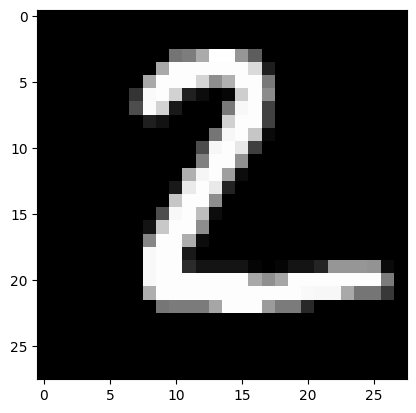

In [ ]:
index=1
img = X_test[index]
plt.imshow(img, cmap="gray")

img = img.reshape(1, 28,28, 1)
pred3 = model.predict(img)

digit =np.argmax(pred3)
print(f"Predicted digit: {digit}")
plt.show()